# Data Exploration

In [1]:
import geopandas as gpd
import matplotlib.patches as patches
import pandas as pd
import numpy as np
from matplotlib_scalebar.scalebar import ScaleBar

In [2]:
# !pip install matplotlib_scalebar

## Floor severity of affected 11 districts

In [3]:

# Load the GeoJSON file
geojson_file = 'dataset/bangladesh_geojson_adm2_64_districts_zillas.json'
gdf = gpd.read_file(geojson_file)
gdf = gdf.rename(columns={'ADM2_EN': 'District'})
gdf

,Shape_Leng,Shape_Area,District,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,ValidTo,geometry
0,12.929816,0.319709,Bagerhat,BD4001,None,None,None,Khulna,BD40,Bangladesh,BD,2015-01-01,2020-11-13,None,"MULTIPOLYGON (((89.84021 21.82784, 89.85325 21..."
1,5.358126,0.401359,Bandarban,BD2003,None,None,None,Chittagong,BD20,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((92.61391 21.85191, 92.61555 21.83217..."
2,4.167970,0.117801,Barguna,BD1004,None,None,None,Barisal,BD10,Bangladesh,BD,2015-01-01,2020-11-13,None,"MULTIPOLYGON (((89.89093 22.15827, 89.89122 22..."
3,7.713625,0.195228,Barisal,BD1006,None,None,None,Barisal,BD10,Bangladesh,BD,2015-01-01,2020-11-13,None,"MULTIPOLYGON (((90.55435 22.59264, 90.54678 22..."
4,10.091155,0.170812,Bhola,BD1009,None,None,None,Barisal,BD10,Bangladesh,BD,2015-01-01,2020-11-13,None,"MULTIPOLYGON (((90.77172 21.85595, 90.77116 21..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,3.596003,0.221992,Sirajganj,BD5088,None,None,None,Rajshahi,BD50,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((89.71534 24.77735, 89.74046 24.76844..."
60,4.741768,0.330139,Sunamganj,BD6090,None,None,None,Sylhet,BD60,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((91.70375 25.15103, 91.71268 25.14702..."
61,4.338167,0.305453,Sylhet,BD6091,None,None,None,Sylhet,BD60,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((92.25078 24.83623, 92.24355 24.81952..."
62,3.644558,0.299525,Tangail,BD3093,None,None,None,Dhaka,BD30,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((90.2905 24.27777, 90.30083 24.26936,..."


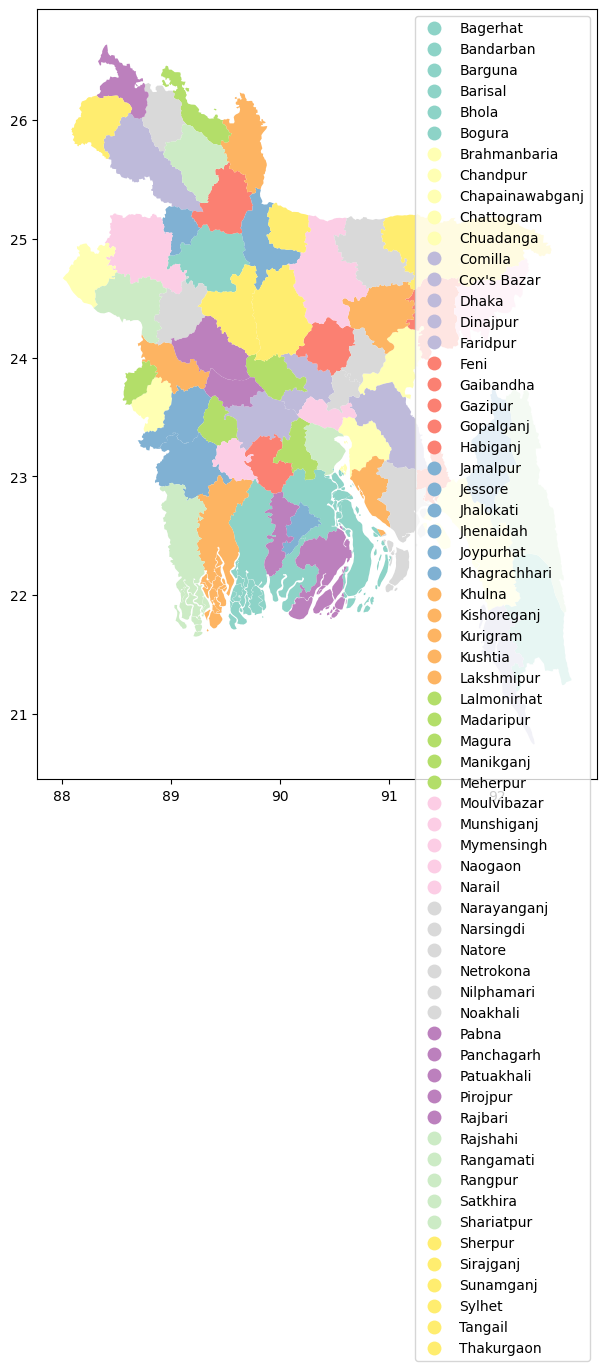

In [4]:
import matplotlib.pyplot as plt

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(column='District', ax=ax, legend=True, cmap='Set3')

# Show the map
plt.show()

/var/folders/xd/bkg103js7ms2lvxxhsmqkz5r0000gn/T/ipykernel_2884/1292743456.py:41: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  for x, y, label in zip(severity_districts.geometry.centroid.x, severity_districts.geometry.centroid.y, severity_districts['District']):


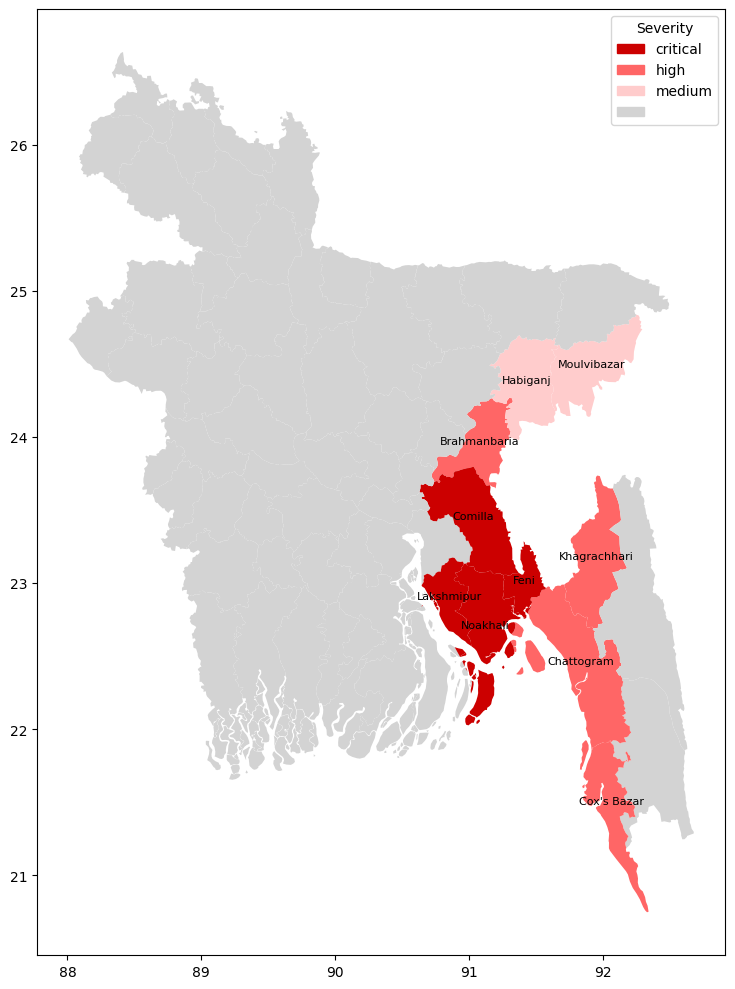

In [5]:
# Define severity based on 'population_density'
def assign_severity(name):
    if name in ['Feni', 'Noakhali', 'Comilla', 'Lakshmipur']:
        return 'critical'
    elif name in ['Brahmanbaria', 'Cox\'s Bazar', 'Khagrachhari', 'Chattogram']:
        return 'high'
    elif name in ['Habiganj', 'Moulvibazar']:
        return 'medium'
    else:
        return None

# selected districts
selected_districts = ['Feni', 'Noakhali', 'Comilla', 'Lakshmipur', 
                      'Brahmanbaria', 'Cox\'s Bazar', 'Khagrachhari', 'Chattogram',
                      'Habiganj', 'Moulvibazar']

gdf['selected_district'] = gdf['District'].apply(lambda x: x if x in selected_districts else np.nan)


# Apply function to 'population_density'
gdf['severity_level'] = gdf['District'].apply(assign_severity)
# Filter GeoDataFrame to include only districts with severity levels
severity_districts = gdf[gdf['severity_level'].notna()]

# Define severity levels and corresponding colors
severity_color_map = {
    'critical': '#cc0000',    # Dark red
    'high': '#ff6666',  # Medium red
    'medium': '#ffcccc',     # Light red
    None: '#d3d3d3'       # Gray for missing values
}

# Apply the color mapping to the 'severity' column
gdf['color'] = gdf['severity_level'].map(severity_color_map)

# Plot the map with the assigned colors
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
gdf.plot(ax=ax, color=gdf['color'])

# Add district names to the map for severity districts only
for x, y, label in zip(severity_districts.geometry.centroid.x, severity_districts.geometry.centroid.y, severity_districts['District']):
    ax.text(x, y, label, fontsize=8, ha='center', color='black')
    # Create legend handles
legend_handles = [
    patches.Patch(color=color, label=label) 
    for label, color in severity_color_map.items()
]


# Add a distance scale bar (e.g., 1 km) # fix++
#scalebar = ScaleBar(1, location='lower left', units='km', scale_loc='bottom')
#ax.add_artist(scalebar)

# Add the legend to the plot
ax.legend(handles=legend_handles, title="Severity", loc="upper right")
# Show the map
plt.tight_layout()
plt.savefig('plots/severity_affected_dist.svg', format='svg')
plt.show()

## Population density (district-wise)

In [6]:
df = pd.read_excel('dataset/Districts_of_Bangladesh.xlsx')
# Remove the text from the column
df['District'] = df['District'].str.replace(' District', '', regex=False)

df.head()

,District,Division,Established,Population (thousands)[28],Area (km2)[28]
0,Barguna,Barisal,1984,901,1940
1,Barisal,Barisal,1797,2426,2786
2,Bhola,Barisal,1984,1947,3405
3,Jhalokati,Barisal,1984,711,751
4,Patuakhali,Barisal,1969,1596,3221


In [7]:
gdf = gdf.merge(df[['District', 'Population (thousands)[28]']], on='District', how='left')
gdf = gdf.rename(columns={'Population (thousands)[28]': 'population_density'})
gdf

,Shape_Leng,Shape_Area,District,ADM2_PCODE,ADM2_REF,ADM2ALT1EN,ADM2ALT2EN,ADM1_EN,ADM1_PCODE,ADM0_EN,ADM0_PCODE,date,validOn,ValidTo,geometry,selected_district,severity_level,color,population_density
0,12.929816,0.319709,Bagerhat,BD4001,None,None,None,Khulna,BD40,Bangladesh,BD,2015-01-01,2020-11-13,None,"MULTIPOLYGON (((89.84021 21.82784, 89.85325 21...",NaN,None,#d3d3d3,1461
1,5.358126,0.401359,Bandarban,BD2003,None,None,None,Chittagong,BD20,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((92.61391 21.85191, 92.61555 21.83217...",NaN,None,#d3d3d3,405
2,4.167970,0.117801,Barguna,BD1004,None,None,None,Barisal,BD10,Bangladesh,BD,2015-01-01,2020-11-13,None,"MULTIPOLYGON (((89.89093 22.15827, 89.89122 22...",NaN,None,#d3d3d3,901
3,7.713625,0.195228,Barisal,BD1006,None,None,None,Barisal,BD10,Bangladesh,BD,2015-01-01,2020-11-13,None,"MULTIPOLYGON (((90.55435 22.59264, 90.54678 22...",NaN,None,#d3d3d3,2426
4,10.091155,0.170812,Bhola,BD1009,None,None,None,Barisal,BD10,Bangladesh,BD,2015-01-01,2020-11-13,None,"MULTIPOLYGON (((90.77172 21.85595, 90.77116 21...",NaN,None,#d3d3d3,1947
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,3.596003,0.221992,Sirajganj,BD5088,None,None,None,Rajshahi,BD50,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((89.71534 24.77735, 89.74046 24.76844...",NaN,None,#d3d3d3,3072
60,4.741768,0.330139,Sunamganj,BD6090,None,None,None,Sylhet,BD60,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((91.70375 25.15103, 91.71268 25.14702...",NaN,None,#d3d3d3,2443
61,4.338167,0.305453,Sylhet,BD6091,None,None,None,Sylhet,BD60,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((92.25078 24.83623, 92.24355 24.81952...",NaN,None,#d3d3d3,5316
62,3.644558,0.299525,Tangail,BD3093,None,None,None,Dhaka,BD30,Bangladesh,BD,2015-01-01,2020-11-13,None,"POLYGON ((90.2905 24.27777, 90.30083 24.26936,...",NaN,None,#d3d3d3,3750


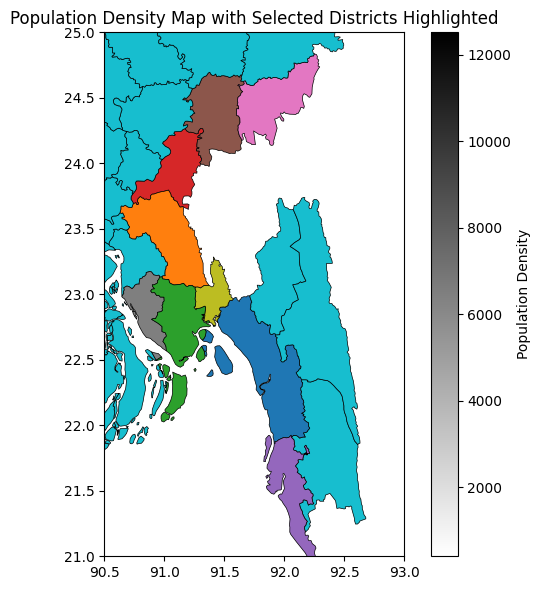

In [11]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Define a custom colormap from white to black
cmap = mcolors.LinearSegmentedColormap.from_list('white_to_black', ['white', 'black'])

# Normalize the population density for color mapping
norm = mcolors.Normalize(vmin=gdf['population_density'].min(), vmax=gdf['population_density'].max())

# Create a new column for colors based on whether the district is selected
gdf['color'] = gdf.apply(
    lambda row: cmap(norm(row['population_density'])) if row['selected_district'] in selected_districts else '#d3d3d3',  axis=1
)

# display(gdf.head(5))
# Plot the GeoDataFrame
fig, ax = plt.subplots(figsize=(6, 6))

# Plot with the colors defined
gdf.plot(column='color', ax=ax, edgecolor='black', linewidth=0.5)

# Add a colorbar for reference (only for selected districts)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=mcolors.Normalize(vmin=gdf['population_density'].min(), vmax=gdf['population_density'].max()))
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax)
cbar.set_label('Population Density')

ax.set_xlim(90.5, 93)
ax.set_ylim(21, 25)

# Set title and other plot properties
ax.set_title('Population Density Map with Selected Districts Highlighted')
# ax.set_axis_off()  # Turn off the axis

plt.tight_layout()
plt.savefig('plots/population_density.svg', format='svg')
plt.show()


# Modeling

# Application